# ***Analyse des prix d'une action***

### SECTION I : IMPORTATION DES LIBRAIRIES ET DES DONNÉES

##### <span style="color:green;">Librairie</span>

In [251]:
#%pip install statsmodels

In [252]:
import pandas as pd
import numpy as np 
import yfinance as yf  # yfinance remplace pandas_DataReader
import matplotlib.pyplot as plt #Visualisation 
import seaborn as sns #Visualisation 
#import scipy as sci 
#import sklearn as sk 
#import datetime as dt #Date 
#import statsmodels.api as sm
#import sympy as sp 
#import warnings
#import pyfolio
#import PyPortofolioOpt  
#import warning 

##### <span style="color:green;">Collecter les données boursière</span>

Pour notre exercice, on fera l'analyse de *Google, Apple, Microsoft, Amazon, Tesla, META (Facebook)* et *le S&P 500* qui sera notre indice de marché. Pour les symboles des actions, ils sont disponibles sur [Yahoo Finance](https://ca.finance.yahoo.com/). 

In [253]:
#liste des symboles
tickers = ['AAPL','META','TSLA','AMZN','MSFT','GOOG','^GSPC']
#Définir les paramêtres 
StartDate = '2020-01-01' #date de début. On aurais pu aussi utiliser la libraire datetime
EndDate = '2024-12-01'  #date de fin 

#Importer les données
Adj_closed_df = yf.download(tickers,start=StartDate,end=EndDate)['Adj Close']
Adj_closed_df

[*********************100%%**********************]  7 of 7 completed


Ticker,AAPL,AMZN,GOOG,META,MSFT,TSLA,^GSPC
Date,,,,,,,
2020-01-02,72.796021,94.900497,68.123718,208.981689,153.630676,28.684000,3257.850098
2020-01-03,72.088287,93.748497,67.789421,207.875931,151.717728,29.534000,3234.850098
2020-01-06,72.662712,95.143997,69.460922,211.790985,152.109879,30.102667,3246.280029
2020-01-07,72.320969,95.343002,69.417580,212.249222,150.722961,31.270666,3237.179932
2020-01-08,73.484352,94.598503,69.964615,214.401016,153.123749,32.809334,3253.050049
...,...,...,...,...,...,...,...
2024-11-22,229.869995,197.119995,166.381256,558.689392,417.000000,352.559998,5969.339844
2024-11-25,232.869995,201.449997,169.237991,564.654541,418.790009,338.589996,5987.370117
2024-11-26,235.059998,207.860001,170.426651,573.077698,427.989990,338.230011,6021.629883


##### <span style="color:green;">Visualisation </span>

In [254]:
Sans_SP = Adj_closed_df.drop(columns='^GSPC')

Axes(0.125,0.2;0.775x0.68)


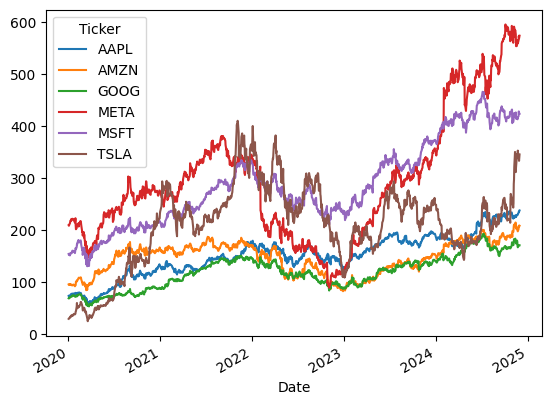

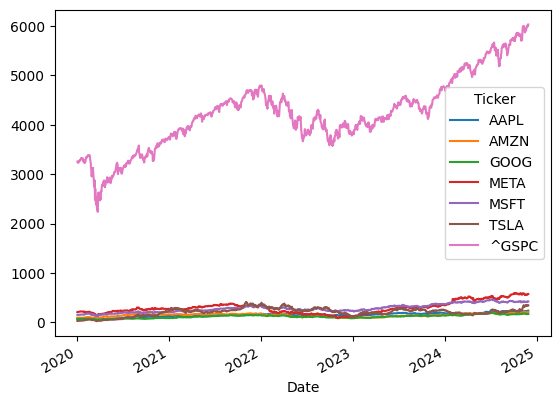

In [255]:
Sans_SP.plot()
print(Adj_closed_df.plot())

##### <span style="color:green;">Analyse exploratoire</span>

In [256]:
Adj_closed_df.describe()

Ticker,AAPL,AMZN,GOOG,META,MSFT,TSLA,^GSPC
count,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000
mean,150.698596,145.400044,118.347605,295.243474,286.562125,209.992651,4229.875862
std,40.511834,30.622102,31.829820,119.291759,80.312485,79.710311,738.848604
min,54.509762,81.820000,52.641857,88.571663,129.881012,24.081333,2237.399902
25%,125.965080,120.511002,93.225029,207.487411,228.185211,173.440002,3808.100098
50%,149.892288,153.380005,119.879265,277.061646,275.498169,219.350006,4193.799805
75%,176.133911,169.149994,140.425430,341.634979,331.979095,257.500000,4574.790039
max,237.330002,214.100006,192.188690,595.459717,465.786438,409.970001,6032.379883


In [257]:
for col in Adj_closed_df.columns :
    rendement = ((Adj_closed_df[col].iloc[-1] -Adj_closed_df[col].iloc[0])/ Adj_closed_df[col].iloc[0])*100
    print(col,round(rendement,2),'%')

AAPL 226.02 %
AMZN 119.06 %
GOOG 149.98 %
META 174.6 %
MSFT 175.64 %
TSLA 1103.32 %
^GSPC 85.16 %


### SECTION II : RENDEMENT

##### <span style="color:green;"> Calcul des rendements et analyse </span>

**Calcul des rendement**

In [258]:
rdt = np.log(Adj_closed_df/Adj_closed_df.shift(1)).dropna()
rdt

Ticker,AAPL,AMZN,GOOG,META,MSFT,TSLA,^GSPC
Date,,,,,,,
2020-01-03,-0.009770,-0.012213,-0.004919,-0.005305,-0.012530,0.029203,-0.007085
2020-01-06,0.007937,0.014776,0.024358,0.018658,0.002581,0.019072,0.003527
2020-01-07,-0.004714,0.002089,-0.000624,0.002161,-0.009160,0.038067,-0.002807
2020-01-08,0.015958,-0.007839,0.007849,0.010087,0.015803,0.048033,0.004890
2020-01-09,0.021018,0.004788,0.010984,0.014210,0.012416,-0.022189,0.006633
...,...,...,...,...,...,...,...
2024-11-22,0.005890,-0.006372,-0.015902,-0.007040,0.009953,0.037335,0.003462
2024-11-25,0.012966,0.021729,0.017024,0.010620,0.004283,-0.040431,0.003016
2024-11-26,0.009360,0.031324,0.006999,0.014807,0.021730,-0.001064,0.005706


##### <span style="color:green;"> Visualisation des rendements </span>

<Axes: xlabel='Date'>

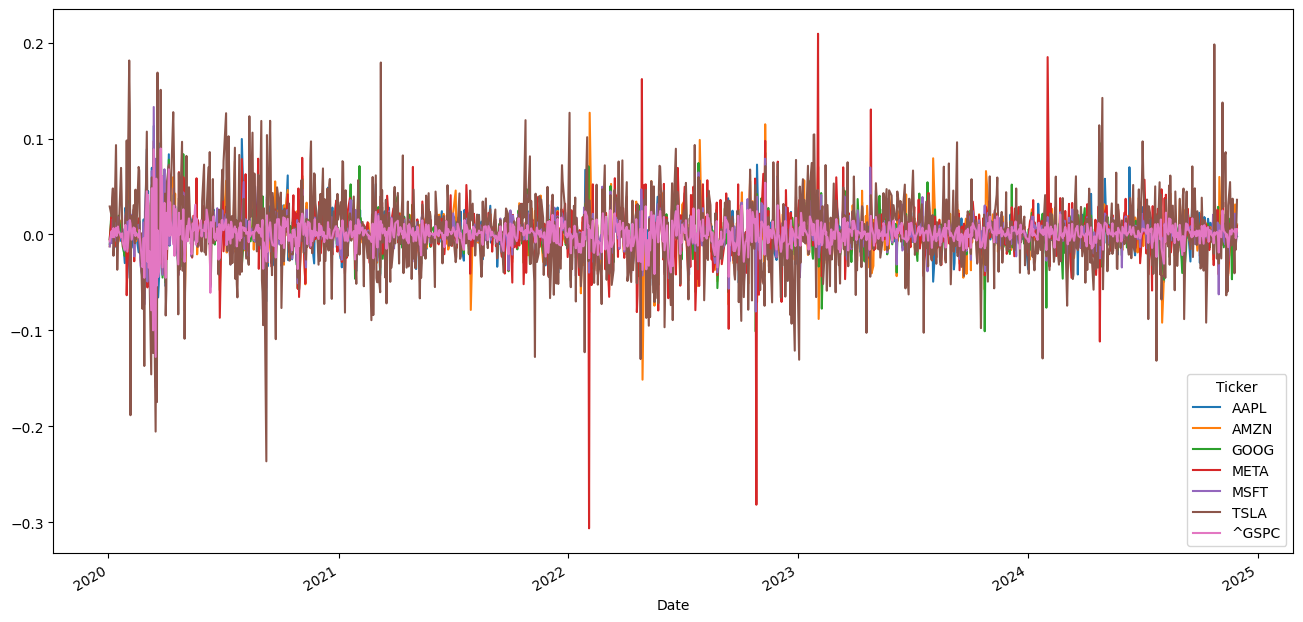

In [259]:
rdt.plot(figsize= (16,8))

In [260]:
# Analyse exploratoire des rendements 
rdt.describe()

Ticker,AAPL,AMZN,GOOG,META,MSFT,TSLA,^GSPC
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000
mean,0.000956,0.000634,0.000741,0.000817,0.000820,0.002013,0.000498
std,0.020066,0.022733,0.020391,0.028749,0.019324,0.042225,0.013563
min,-0.137708,-0.151398,-0.117667,-0.306391,-0.159454,-0.236518,-0.127652
25%,-0.008504,-0.011357,-0.009570,-0.011744,-0.008503,-0.020257,-0.005322
50%,0.001148,0.000789,0.002127,0.001177,0.001112,0.001869,0.000911
75%,0.012067,0.012834,0.011109,0.014400,0.010910,0.022671,0.007272
max,0.113158,0.126949,0.094994,0.209308,0.132929,0.198187,0.089683


##### <span style="color:green;"> Matrice de corrélation et heatmap </span>

In [261]:
#Corrélation
Corr = rdt.corr()
Corr

Ticker,AAPL,AMZN,GOOG,META,MSFT,TSLA,^GSPC
Ticker,,,,,,,
AAPL,1.000000,0.595393,0.655301,0.561565,0.751570,0.493633,0.793478
AMZN,0.595393,1.000000,0.654503,0.605427,0.679075,0.432938,0.642210
GOOG,0.655301,0.654503,1.000000,0.639637,0.748858,0.402780,0.746649
META,0.561565,0.605427,0.639637,1.000000,0.617200,0.331912,0.618257
MSFT,0.751570,0.679075,0.748858,0.617200,1.000000,0.453407,0.823061
TSLA,0.493633,0.432938,0.402780,0.331912,0.453407,1.000000,0.509034
^GSPC,0.793478,0.642210,0.746649,0.618257,0.823061,0.509034,1.000000


<Axes: xlabel='Ticker', ylabel='Ticker'>

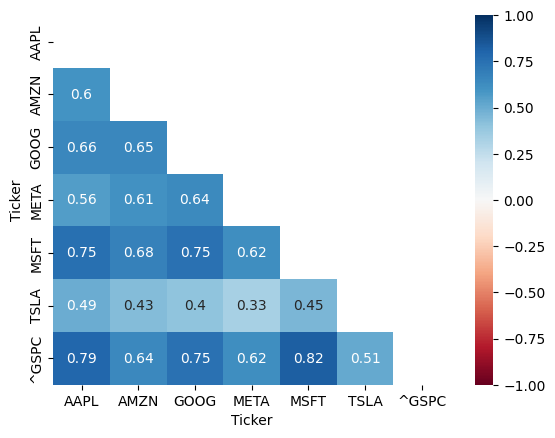

In [262]:
# Carte de corrélation 
mask = np.triu(np.ones_like(Corr, dtype=bool))
sns.heatmap(Corr, mask=mask,center=0, vmin=-1, vmax=1, annot=True, cmap='RdBu')

##### <span style="color:green;"> Rendement journalier, mensuel et annuel </span>

In [263]:
# Rendement journalier moyen
# Ces rendement sont aussi disponible dans le tableau descriptif des rendements

Rdt_moyen = rdt.mean()
for i in tickers:
    print('le rendement moyen journalier de', i, 'est :', round(Rdt_moyen[i]*100,5), '%')


le rendement moyen journalier de AAPL est : 0.09561 %
le rendement moyen journalier de META est : 0.08173 %
le rendement moyen journalier de TSLA est : 0.20127 %
le rendement moyen journalier de AMZN est : 0.06344 %
le rendement moyen journalier de MSFT est : 0.08203 %
le rendement moyen journalier de GOOG est : 0.07413 %
le rendement moyen journalier de ^GSPC est : 0.04984 %


>Pour le calcul des rendements moyen mensuel et annuel, on doit multiplier les rendements journalier obtenue par 21 pour les rendements mensuels et par 252 pour les rendements annuels (ou 253). 
###### ***NB :*** Ces nombres represente le nombre de jours de trading par mois et par an 


In [264]:
# Rendement mensuel
for i in tickers:
    print('le rendement moyen mensuel de', i, 'est :', round(Rdt_moyen[i]*21*100,5), '%')

le rendement moyen mensuel de AAPL est : 2.0079 %
le rendement moyen mensuel de META est : 1.71625 %
le rendement moyen mensuel de TSLA est : 4.22662 %
le rendement moyen mensuel de AMZN est : 1.33234 %
le rendement moyen mensuel de MSFT est : 1.72266 %
le rendement moyen mensuel de GOOG est : 1.55668 %
le rendement moyen mensuel de ^GSPC est : 1.04673 %


In [265]:
# Rendement annuel
for i in tickers:
    print('le rendement moyen annuel de', i, 'est :', round(Rdt_moyen[i]*252*100,5), '%')

le rendement moyen annuel de AAPL est : 24.09475 %
le rendement moyen annuel de META est : 20.59496 %
le rendement moyen annuel de TSLA est : 50.71946 %
le rendement moyen annuel de AMZN est : 15.98814 %
le rendement moyen annuel de MSFT est : 20.6719 %
le rendement moyen annuel de GOOG est : 18.68016 %
le rendement moyen annuel de ^GSPC est : 12.56073 %


### SECTION III: RISQUE

##### <span style="color:green;"> Histogramme des rendements journaliers </span>

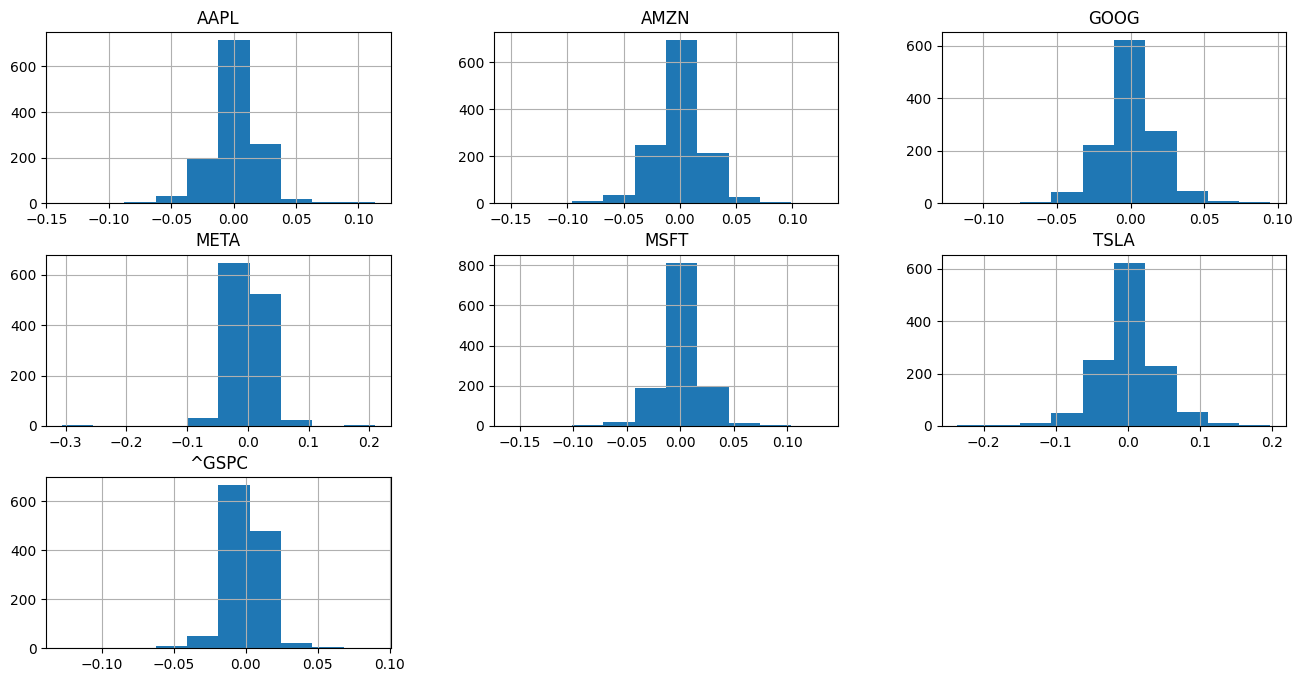

In [266]:
rdt.hist(figsize=(16,8));

In [267]:
# Étendue de la variation des rendements
for i in tickers:
    print("L'étendue des rendements de", i, "est", round(rdt[i].max()-rdt[i].min(),2))

L'étendue des rendements de AAPL est 0.25
L'étendue des rendements de META est 0.52
L'étendue des rendements de TSLA est 0.43
L'étendue des rendements de AMZN est 0.28
L'étendue des rendements de MSFT est 0.29
L'étendue des rendements de GOOG est 0.21
L'étendue des rendements de ^GSPC est 0.22


In [268]:
# Volatilité journalière 
rdt.std()

Ticker
AAPL     0.020066
AMZN     0.022733
GOOG     0.020391
META     0.028749
MSFT     0.019324
TSLA     0.042225
^GSPC    0.013563
dtype: float64

In [269]:
# Volatilité mensuelle
for i in tickers:
    print("La volatilité mensuelle de ", i, "est", round((rdt[i].std()*np.sqrt(21))*100, 4), '% par mois')

La volatilité mensuelle de  AAPL est 9.1952 % par mois
La volatilité mensuelle de  META est 13.1743 % par mois
La volatilité mensuelle de  TSLA est 19.35 % par mois
La volatilité mensuelle de  AMZN est 10.4178 % par mois
La volatilité mensuelle de  MSFT est 8.8554 % par mois
La volatilité mensuelle de  GOOG est 9.3441 % par mois
La volatilité mensuelle de  ^GSPC est 6.2155 % par mois


In [270]:
# Volatilité annuelle
for i in tickers:
    print("La volatilité annuelle de ", i, "est", round((rdt[i].std()*np.sqrt(252))*100, 4), '% par an')

La volatilité annuelle de  AAPL est 31.8531 % par an
La volatilité annuelle de  META est 45.6371 % par an
La volatilité annuelle de  TSLA est 67.0304 % par an
La volatilité annuelle de  AMZN est 36.0882 % par an
La volatilité annuelle de  MSFT est 30.676 % par an
La volatilité annuelle de  GOOG est 32.369 % par an
La volatilité annuelle de  ^GSPC est 21.5311 % par an


##### <span style="color:green;"> Ratio de sharpe </span>

$Sharpe Ratio$ = $\frac{R_p - R_f}{\sigma_p}$

$R_p$ = rendement de l'actif\
$R_f$ = rendement de l'actif sans risque\
$\sigma_p$ = écart-type de l'actif 

In [271]:
# Fonction du ratio Sharpe
def Sharpe_ratio(Serie,rf, n_days):
    # Rendement de la serie de rendement
    Rp = Serie.mean() * n_days
    # Volatilité de la serie pour une période (21==>Mensuel, 252==>Annuel)
    sigma = Serie.std() * np.sqrt(n_days)
    # Ratio de Sharpe
    Sharpe = (Rp - rf)/sigma

    return Sharpe

In [272]:
for i in tickers:
    print("Le ratio de Sharpe de", i, "est :", round(Sharpe_ratio(rdt[i],0.01,21),3))

Le ratio de Sharpe de AAPL est : 0.11
Le ratio de Sharpe de META est : 0.054
Le ratio de Sharpe de TSLA est : 0.167
Le ratio de Sharpe de AMZN est : 0.032
Le ratio de Sharpe de MSFT est : 0.082
Le ratio de Sharpe de GOOG est : 0.06
Le ratio de Sharpe de ^GSPC est : 0.008


##### <span style="color:green;"> Ratio de Sortino </span>

$Sortino$ = $\frac{R_p - R_f}{\sigma_{\text{ps}}}$

$\sigma_{\text{ps}}$ = sémi-variance. C'est la variance des rendements négatifs.

In [273]:
# Fonction du ratio sortino
def Sortino(Serie,rf, n_days,seuil = 0):
    # Vecteur des rendements négatifs
    neg_rdt = Serie[Serie<=seuil]
    # rendement moyen de la série
    Rp = Serie.mean()*n_days
    # sémi-variance, les rendements inférieurs au seuil
    Semi_Sigma = neg_rdt.std()*np.sqrt(n_days)

    return (Rp - rf)/Semi_Sigma

In [274]:
for i in tickers : 
    print('Le ratio de sortino de', i,'est', round(Sortino(rdt[i],0.01,21), 3))

Le ratio de sortino de AAPL est 0.151
Le ratio de sortino de META est 0.065
Le ratio de sortino de TSLA est 0.236
Le ratio de sortino de AMZN est 0.045
Le ratio de sortino de MSFT est 0.11
Le ratio de sortino de GOOG est 0.08
Le ratio de sortino de ^GSPC est 0.009


### SECTION III : TEST DE NORMALITÉ DES RENDEMENTS

##### <span style="color:green;"> Coefficient d'asymétrie </span>

![Asymétrie](1.+Coefficient+d’asymétrie+(suite).jpg)

In [275]:
rdt.skew()

Ticker
AAPL    -0.107859
AMZN    -0.126738
GOOG    -0.254394
META    -1.232365
MSFT    -0.280678
TSLA    -0.107203
^GSPC   -0.820294
dtype: float64

##### <span style="color:green;"> Coefficient d'applatissement </span>

$$
k_4 = \frac{n(n+1) \sum_{i=1}^n (x_i - \bar{x})^4 - 3(n-1) \left( \sum_{i=1}^n (x_i - \bar{x})^2 \right)^2}{(n-1)(n-2)(n-3)}
$$


![Applatissement](Coefficient+d’aplatissement+(kurtosis).jpg)

In [276]:
rdt.kurt()

Ticker
AAPL      5.311895
AMZN      4.086497
GOOG      3.765710
META     23.002731
MSFT      7.504306
TSLA      3.299104
^GSPC    14.166688
dtype: float64

##### <span style="color:green;"> Test de normalité des rendements </span>

In [277]:
# Importer les modules 
from scipy.stats import shapiro, normaltest

In [278]:
# Test de Shapiro Wilk
def Shapiro_wilk_test(Serie, c) :
    pvalue = shapiro(Serie)[1]
    if pvalue < c :
        print('Hypothèse nulle de normalité rejettée')
    else:
        pvalue > c 
        print('Hypothèse nulle ne peut être rejettée')

    return pvalue

In [279]:
# Test d'Agostino et de Pearson : vérifie à la fois l'asymétrie et l'applatissement pour tester la normalité
def Agostino_Pearson(Serie, c):
    pvalue = normaltest(Serie)[1]
    if pvalue < c :
        print('Hypothèse nulle de normalité rejettée')
    else:
        pvalue > c 
        print('Hypothèse nulle ne peut être rejettée')
    
    return pvalue

Application 

In [280]:
# Test de Shapiro Wilk
for i in tickers : 
    print('Les rendements de ',i)
    print(Shapiro_wilk_test(rdt[i],0.05))
    print('_'*30)

Les rendements de  AAPL
Hypothèse nulle de normalité rejettée
1.9997967920257147e-21
______________________________
Les rendements de  META
Hypothèse nulle de normalité rejettée
5.506788876181572e-33
______________________________
Les rendements de  TSLA
Hypothèse nulle de normalité rejettée
1.0269888111529071e-17
______________________________
Les rendements de  AMZN
Hypothèse nulle de normalité rejettée
5.53353468997441e-18
______________________________
Les rendements de  MSFT
Hypothèse nulle de normalité rejettée
7.076111108317288e-23
______________________________
Les rendements de  GOOG
Hypothèse nulle de normalité rejettée
1.5100299176418077e-19
______________________________
Les rendements de  ^GSPC
Hypothèse nulle de normalité rejettée
1.3073710440912825e-30
______________________________


In [281]:
# Test d'Agostino_Pearson
for i in tickers : 
    print('Les rendements de ',i)
    print(Agostino_Pearson(rdt[i],0.05))
    print('_'*30)

Les rendements de  AAPL
Hypothèse nulle de normalité rejettée
1.0386771855731522e-33
______________________________
Les rendements de  META
Hypothèse nulle de normalité rejettée
2.8956006267680182e-117
______________________________
Les rendements de  TSLA
Hypothèse nulle de normalité rejettée
5.0561474602840464e-23
______________________________
Les rendements de  AMZN
Hypothèse nulle de normalité rejettée
9.137894669740952e-28
______________________________
Les rendements de  MSFT
Hypothèse nulle de normalité rejettée
1.692212785247698e-45
______________________________
Les rendements de  GOOG
Hypothèse nulle de normalité rejettée
4.3018283221534995e-28
______________________________
Les rendements de  ^GSPC
Hypothèse nulle de normalité rejettée
1.8256772558305725e-83
______________________________


### SECTION IV : CAPM, Regression linéaire

In [282]:
tickers

['AAPL', 'META', 'TSLA', 'AMZN', 'MSFT', 'GOOG', '^GSPC']

##### <span style="color:green;"> Importer les données financières mensuelles </span>

In [283]:
Monthly_price =yf.download(tickers,start=StartDate,end=EndDate,interval="1mo")["Adj Close"]
Monthlyreturn = np.log(Monthly_price/Monthly_price.shift(1)).dropna()
Monthlyreturn.head()

[*********************100%%**********************]  7 of 7 completed


Ticker,AAPL,AMZN,GOOG,META,MSFT,TSLA,^GSPC
Date,,,,,,,
2020-02-01,-0.124201,-0.064233,-0.068459,-0.047882,-0.049492,0.026424,-0.087860
2020-03-01,-0.069944,0.034421,-0.141330,-0.143145,-0.024173,-0.242781,-0.133668
2020-04-01,0.144424,0.238150,0.148272,0.204799,0.127800,0.400210,0.119421
2020-05-01,0.078963,-0.012867,0.057807,0.094906,0.022293,0.065730,0.044287
2020-06-01,0.140190,0.121834,-0.010772,0.008758,0.107645,0.257109,0.018221


##### <span style="color:green;"> Calcul du béta et  de la moyenne des rendements </span>

In [284]:
def beta(Asset, Market):
    cov = Asset.cov(Market)
    VaR_M = Market.var()
    Beta = cov/VaR_M
    return Beta

In [285]:
Beta_ptf = []
for i in tickers:
    b = beta(Monthlyreturn[i],Monthlyreturn["^GSPC"])
    Beta_ptf.append(b)
    print(f"le Béta de ", i, "est : {}".format(b))

le Béta de  AAPL est : 1.1994908976863006
le Béta de  META est : 1.1825510197766482
le Béta de  TSLA est : 2.147114425790619
le Béta de  AMZN est : 1.1433326290062615
le Béta de  MSFT est : 0.8853503308085453
le Béta de  GOOG est : 1.0415277129271971
le Béta de  ^GSPC est : 1.0000000000000002


In [286]:
Beta_ptf = pd.Series(Beta_ptf, index=tickers)
Beta_ptf = Beta_ptf.drop("^GSPC")
Beta_ptf

AAPL    1.199491
META    1.182551
TSLA    2.147114
AMZN    1.143333
MSFT    0.885350
GOOG    1.041528
dtype: float64

In [287]:
Mean = Monthlyreturn.mean().drop("^GSPC")
Mean

Ticker
AAPL    0.019839
AMZN    0.012543
GOOG    0.014974
META    0.018075
MSFT    0.016445
TSLA    0.035762
dtype: float64

##### <span style="color:green;"> Visualisation et calcul des rendements espéré selon le CAPM </span>

In [288]:
data = pd.concat([Beta_ptf,Mean], axis=1)
data.columns = ["Béta", "MEAN"]
data

,Béta,MEAN
AAPL,1.199491,0.019839
META,1.182551,0.018075
TSLA,2.147114,0.035762
AMZN,1.143333,0.012543
MSFT,0.885350,0.016445
GOOG,1.041528,0.014974


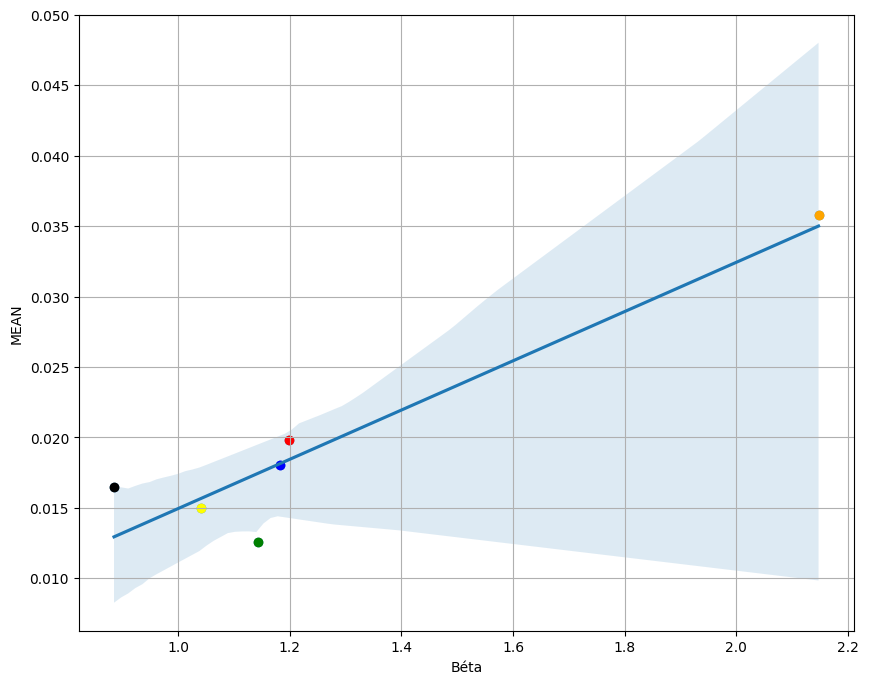

In [289]:
plt.figure(figsize=(10,8))
plt.grid()
sns.regplot(x="Béta", y="MEAN", data=data)
plt.scatter(x=Beta_ptf["AAPL"], y=Mean["AAPL"], color="red")
plt.scatter(x=Beta_ptf["AMZN"], y=Mean["AMZN"], color="green")
plt.scatter(x=Beta_ptf["GOOG"], y=Mean["GOOG"], color="yellow")
plt.scatter(x=Beta_ptf["MSFT"], y=Mean["MSFT"], color="black")
plt.scatter(x=Beta_ptf["TSLA"], y=Mean["TSLA"], color="orange")
plt.scatter(x=Beta_ptf["META"], y=Mean["META"], color="blue")

In [290]:
def CAPM(Asset, Market, rf = 0.01): 
    R = rf + ((Asset.cov(Market)/Market.var())*(Market.mean()-rf))
    return R

In [291]:
CAPM_ptf = []
for i in tickers:
    Capm = CAPM(Monthlyreturn[i],Monthlyreturn["^GSPC"])
    CAPM_ptf.append(Capm)
    print(f"le rendement espérée selon le modèle du CAPM de ", i, "est : {}".format(Capm))

le rendement espérée selon le modèle du CAPM de  AAPL est : 0.01095230111695009
le rendement espérée selon le modèle du CAPM de  META est : 0.010938852190671885
le rendement espérée selon le modèle du CAPM de  TSLA est : 0.011704639418143212
le rendement espérée selon le modèle du CAPM de  AMZN est : 0.010907715883253743
le rendement espérée selon le modèle du CAPM de  MSFT est : 0.010702898296725223
le rendement espérée selon le modèle du CAPM de  GOOG est : 0.010826890813651208
le rendement espérée selon le modèle du CAPM de  ^GSPC est : 0.010793921086676843


In [292]:
CAPM_ptf = pd.Series(CAPM_ptf, index= tickers).drop("^GSPC")
CAPM_ptf 

AAPL    0.010952
META    0.010939
TSLA    0.011705
AMZN    0.010908
MSFT    0.010703
GOOG    0.010827
dtype: float64

In [293]:
data_CAPM = pd.concat([data,CAPM_ptf], axis=1)
data_CAPM.columns = ["Béta","MEAN","CAPM"]
data_CAPM

,Béta,MEAN,CAPM
AAPL,1.199491,0.019839,0.010952
META,1.182551,0.018075,0.010939
TSLA,2.147114,0.035762,0.011705
AMZN,1.143333,0.012543,0.010908
MSFT,0.885350,0.016445,0.010703
GOOG,1.041528,0.014974,0.010827


In [294]:
tickers_CAPM = tickers[:-1]
tickers_CAPM

['AAPL', 'META', 'TSLA', 'AMZN', 'MSFT', 'GOOG']

In [295]:
for i in tickers_CAPM:
    print("le alpha de JENSEN de ", i, "est :", round(data_CAPM["MEAN"][i]-data_CAPM["CAPM"][i], 5))

le alpha de JENSEN de  AAPL est : 0.00889
le alpha de JENSEN de  META est : 0.00714
le alpha de JENSEN de  TSLA est : 0.02406
le alpha de JENSEN de  AMZN est : 0.00164
le alpha de JENSEN de  MSFT est : 0.00574
le alpha de JENSEN de  GOOG est : 0.00415


In [296]:
#from scipy import stats 

In [297]:
"""
def CAPM_regression(Asset,Market):
   slope, intercept, r, p, se = stats.linregress(Asset,Market) 
   plt.plot(Asset, Market, 'o', label='original data')
   plt.plot(Asset, intercept + slope*Asset, 'r', label='fitted line')
   plt.title(i,loc="center")
   plt.legend()
   plt.show()
"""

'\ndef CAPM_regression(Asset,Market):\n   slope, intercept, r, p, se = stats.linregress(Asset,Market) \n   plt.plot(Asset, Market, \'o\', label=\'original data\')\n   plt.plot(Asset, intercept + slope*Asset, \'r\', label=\'fitted line\')\n   plt.title(i,loc="center")\n   plt.legend()\n   plt.show()\n'

In [298]:
"""
for i in tickers_CAPM:
    print(CAPM_regression(Monthlyreturn[i], Monthlyreturn["^GSPC"])) 
"""

'\nfor i in tickers_CAPM:\n    print(CAPM_regression(Monthlyreturn[i], Monthlyreturn["^GSPC"])) \n'

In [299]:
"""
X = Monthlyreturn['AAPL']
y = Monthlyreturn['^GSPC' ]

X1 = sm.add_constant(X)
model = sm.OLS(y,X1)

results = model.fit()
results.summary()
"""

"\nX = Monthlyreturn['AAPL']\ny = Monthlyreturn['^GSPC' ]\n\nX1 = sm.add_constant(X)\nmodel = sm.OLS(y,X1)\n\nresults = model.fit()\nresults.summary()\n"

### SECTION V : CONCEPTION D'UN PORTEFEUILLE 

In [300]:
#Générer les portefeuilles aléatoires 
iteration = 100000

ret = np.zeros(iteration)
vol = np.zeros(iteration)
shape_R = np.zeros(iteration)
wt = np.zeros((iteration, len(rdt.columns)))

In [301]:
for i in range(iteration):
    w = np.random.random(len(rdt.columns))
    w = w/np.sum(w)
    
    wt[i, :] = w
    ret[i] = np.sum(rdt.mean()*w)
    vol[i] = np.sqrt(np.dot(w.T,np.dot(rdt.cov(),w)))
    shape_R[i] = (ret[i]-0.0003)/vol[i]

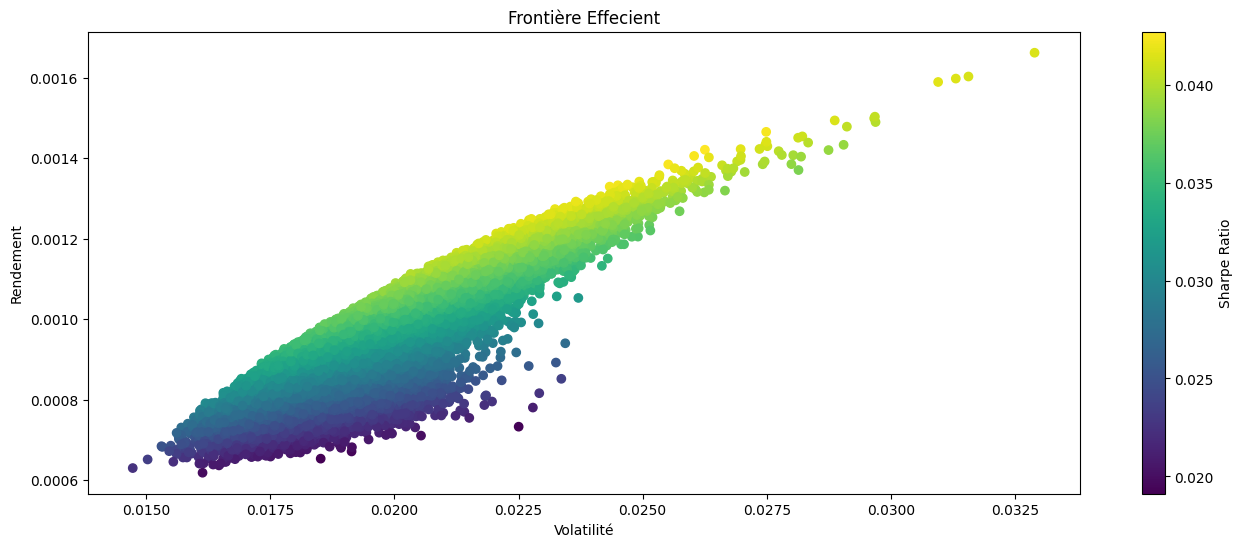

In [302]:
plt.figure(figsize=(16,6))
plt.scatter(vol, ret, c = shape_R, cmap = 'viridis')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatilité')
plt.ylabel('Rendement')
plt.title('Frontière Effecient')
plt.show()

In [303]:
vol = pd.Series(vol)
ret = pd.Series(ret)
wt = pd.DataFrame(wt)

#GMV
min_vol = vol.iloc[vol.argmin()]
min_ret = ret.iloc[vol.argmin()]

In [304]:
#Sharpe
max_ret = ret.iloc[shape_R.argmax()]
max_vol = vol.iloc[shape_R.argmax()]

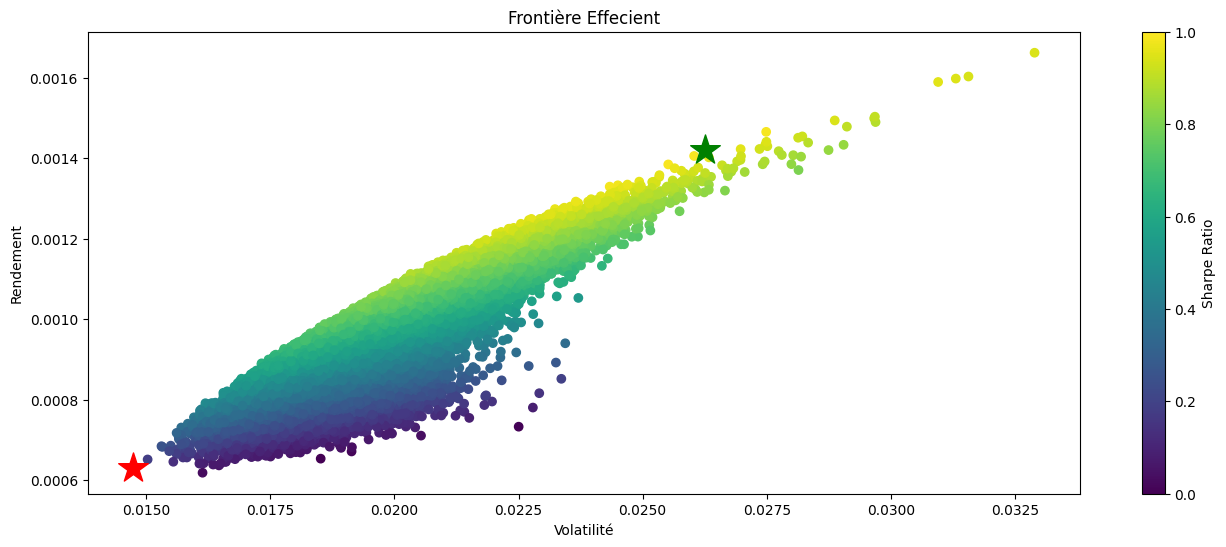

In [305]:
plt.figure(figsize=(16,6))
plt.scatter(vol, ret, c = shape_R, cmap = 'viridis')
plt.scatter(min_vol, min_ret, color='r', marker='*', s=500 )
plt.scatter(max_vol, max_ret, color='g', marker='*', s=500 )
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatilité')
plt.ylabel('Rendement')
plt.title('Frontière Effecient')
plt.show()

In [306]:
Gmv = wt.iloc[vol.argmin()]
Gmv.index = rdt.columns
Gmv

Ticker
AAPL     0.122293
AMZN     0.095174
GOOG     0.024632
META     0.014249
MSFT     0.051485
TSLA     0.023810
^GSPC    0.668357
Name: 16350, dtype: float64

In [307]:
Sharpe = wt.iloc[shape_R.argmax()]
Sharpe.index= rdt.columns
Sharpe

Ticker
AAPL     0.403027
AMZN     0.006286
GOOG     0.111403
META     0.003960
MSFT     0.005312
TSLA     0.467110
^GSPC    0.002902
Name: 33888, dtype: float64

In [308]:
VarCov = rdt.cov()

In [309]:
Cov_Matrix_GMVSHARPE = np.array(Gmv).T@VarCov@np.array(Sharpe)
Cov_Matrix_GMVSHARPE

np.float64(0.00030299901537868105)

In [310]:
w_GMV = np.linspace(0,3,100)
W_Sharpe = 1- w_GMV

Er_fr_eff = (w_GMV * min_ret + W_Sharpe * max_ret)
Std_fr_eff = np.sqrt(((w_GMV*min_vol)**2+(W_Sharpe*max_vol)**2+2*w_GMV*W_Sharpe*Cov_Matrix_GMVSHARPE))

In [311]:
rf = 0.00033
cml_vol = np.linspace(0,max_vol*1.5,100)
cml_ret = rf + (max_ret-rf)*(cml_vol/max_vol)

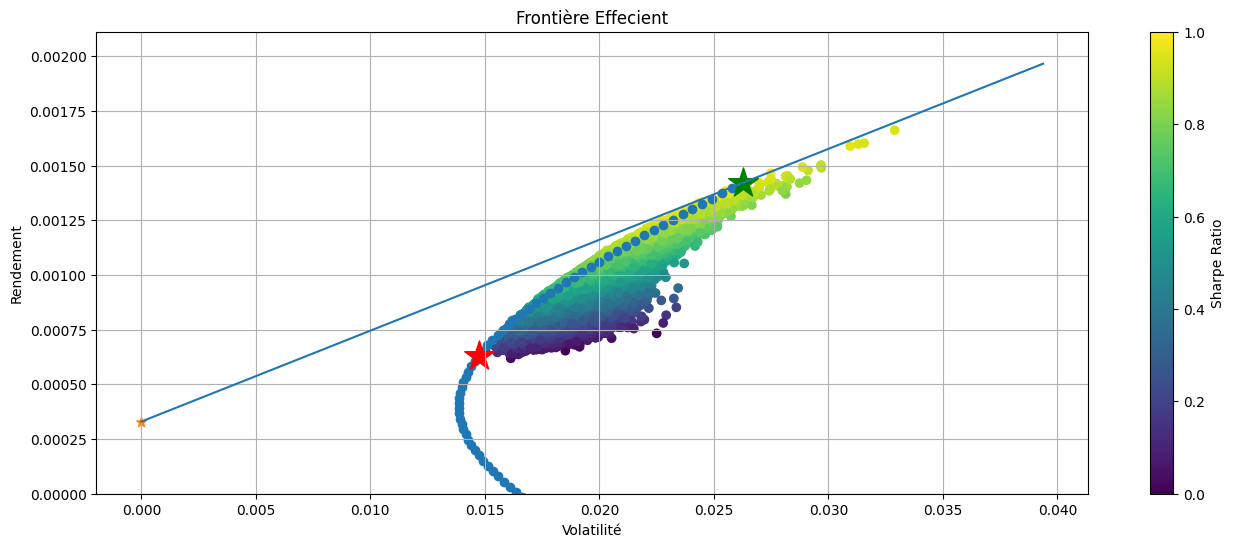

In [312]:
plt.figure(figsize=(16,6))
plt.grid()
plt.scatter(vol, ret, c = shape_R, cmap = 'viridis')
plt.scatter(Std_fr_eff, Er_fr_eff)
plt.scatter(min_vol, min_ret, color='r', marker='*', s=500 )
plt.scatter(max_vol, max_ret, color='g', marker='*', s=500 )
plt.scatter(0.0, rf, marker='*', s=50 )
plt.plot(cml_vol,cml_ret)
plt.ylim(0.00)
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatilité')
plt.ylabel('Rendement')
plt.title('Frontière Effecient')
plt.show()

In [313]:
#Définir les paramêtres
StartDate1 = '2025-01-01' #date de début. On aurais pu aussi utiliser la libraire datetime
EndDate1 = '2025-01-10'  #date de fin

#Importer les données
Adj_closed_df1 = yf.download(tickers,start=StartDate1,end=EndDate1)["Close"]

#les rendements
rdt1 = np.log(Adj_closed_df1/Adj_closed_df1.shift(1)).dropna()
rdt1

[*********************100%%**********************]  7 of 7 completed


Ticker,AAPL,AMZN,GOOG,META,MSFT,TSLA,^GSPC
Date,,,,,,,
2025-01-03,-0.002011,0.017867,0.013029,0.008955,0.011331,0.078955,0.012517
2025-01-06,0.006716,0.015140,0.024701,0.041421,0.010573,0.001485,0.005523
2025-01-07,-0.011453,-0.024461,-0.006334,-0.019727,-0.012891,-0.041451,-0.011166
2025-01-08,0.002021,0.000090,-0.006733,-0.011672,0.005172,0.001470,0.001559


In [314]:
rdt1_moyen = rdt1.mean()
std1 = rdt1.std()

In [315]:
rdt1_moyen*21*100

Ticker
AAPL     -2.481784
AMZN      4.533777
GOOG     12.948157
META      9.962595
MSFT      7.447301
TSLA     21.241051
^GSPC     4.427454
dtype: float64

In [316]:
#GMV 
print((round(Gmv.T@rdt1_moyen,5)*21)*100, '%')
print((round(Gmv.T@rdt.cov()@Gmv,5)*np.sqrt(21))*100, '%')

4.430999999999999 %
0.10081666528902848 %


In [317]:
#Sharpe
print((round(Sharpe.T@rdt1_moyen,5)*21)*100, '%')
print((round(Sharpe.T@rdt.cov()@Sharpe,5)*np.sqrt(21))*100, '%')

10.479 %
0.316197722951953 %


In [318]:
Std_semi = rdt1[rdt1<=0].std()
Std_semi

Ticker
AAPL     0.006676
AMZN          NaN
GOOG     0.000282
META     0.005696
MSFT          NaN
TSLA          NaN
^GSPC         NaN
dtype: float64

In [319]:
rdt_semi = rdt1[rdt1<=0].mean()
rdt_semi

Ticker
AAPL    -0.006732
AMZN    -0.024461
GOOG    -0.006534
META    -0.015699
MSFT    -0.012891
TSLA    -0.041451
^GSPC   -0.011166
dtype: float64